## Horses vs Humans image classification

**Problem description**

Correctly classify images from a dataset of horses or humans images

**Dataset**

The set contains 500 rendered images of various species of horse in various poses in various locations. It also contains 527 rendered images of humans in various poses and locations. The validation set adds 6 different figures of different gender, race and pose to ensure breadth of data.

- Horses or Humans is a dataset of images of size 300×300 pixels in 24-bit color
- https://www.kaggle.com/sanikamal/horses-or-humans-dataset
- http://www.laurencemoroney.com/horses-or-humans-dataset/

**Architecture**

- CNN 
- Output layer with 1 units. 
- Defined a callback function to stop training as soon as accuracy reaches 99.9%

**Libraries**
- tensorflow
- keras
- matplotlib

**performance:** 

### Import Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras.preprocessing import image
%matplotlib inline
import os
import zipfile
tf.__version__

Using TensorFlow backend.


'1.14.0'

In [2]:
%config IPCompleter.greedy=True

### Unzip the dataset

In [3]:
local_zip = 'data/horse-or-human.zip'
if (os.path.isdir(local_zip)):
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('/data/')
    zip_ref.close()

### Analyze the data

In [4]:
# Directory with training horse pictures
train_horse_dir = os.path.join('data/horse-or-human/train/horses')

# Directory with training human pictures
train_human_dir = os.path.join('data/horse-or-human/train/humans')

# Directory with validation horses pictures
valid_horse_dir = os.path.join('data/horse-or-human/validation/horses')

# Directory with validation humans pictures
valid_human_dir = os.path.join('data/horse-or-human/validation/humans')

In [5]:
# print the name of the horse images in the training dataset
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:6])

# print the name of the human images in the training dataset
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:5])

# print the name of the horse images in the validation dataset
valid_horse_names = os.listdir(valid_horse_dir)
print(valid_horse_names[:5])

# print the name of the human images in the validation dataset
valid_human_names = os.listdir(valid_human_dir)
print(valid_human_names[:5])

['horse07-1.png', 'horse32-1.png', 'horse26-5.png', 'horse50-7.png', 'horse19-6.png', 'horse34-4.png']
['human01-17.png', 'human06-25.png', 'human01-16.png', 'human11-10.png', 'human07-02.png']
['horse5-076.png', 'horse5-400.png', 'horse1-539.png', 'horse2-383.png', 'horse5-458.png']
['valhuman05-00.png', 'valhuman03-03.png', 'valhuman04-04.png', 'valhuman04-24.png', 'valhuman03-04.png']


In [6]:
# print the total number of horse and human images in the directories

print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(valid_horse_dir)))
print('total validation human images:', len(os.listdir(valid_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


### Display images from the training set

In [7]:
nrows=4
ncols=4

fig = plt.gcf()
fig.set_size_inches(nrows * 4, ncols * 4)
next_horse_pic_list = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[0: 8]]
next_human_pic_list = [os.path.join(train_human_dir, fname) for fname in train_human_names[0: 8]]

for i, img_path in enumerate(next_horse_pic_list+next_human_pic_list):
    # setup sub-plot; sub-plot indices start at 1
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

### Build CNN Model

In [8]:
img_size = 150

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150 x 150 with 3 bytes color channel
    # First convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # Second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into DNN (Dense NN)
    tf.keras.layers.Flatten(),
    # 128 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

W0823 09:25:22.267243 140577429923648 deprecation.py:506] From /home/agoel/anaconda3/envs/ML/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
# The "output shape" column shows how the size of the feature map evolves in each successive layer. 
# The convolution layers reduce the size of the feature maps by a bit due to padding, 
# and each pooling layer halves the dimensions.
# print the model summary.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

### Compile the model

In [10]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])

W0823 09:25:23.736342 140577429923648 deprecation.py:323] From /home/agoel/anaconda3/envs/ML/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Data preprocessing

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale all thew images to 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)

train_batches = train_datagen.flow_from_directory(
                    'data/horse-or-human/train', # source directory for training images.
                     target_size=(img_size, img_size),
                     batch_size =128,
                     # Since we use binary_crossentropy loss, we need binary labels
                     class_mode='binary')

valid_batches = valid_datagen.flow_from_directory(
                    'data/horse-or-human/validation',
                     target_size=(img_size, img_size),
                     batch_size = 32,
                     # Since we use binary_crossentropy loss, we need binary labels
                     class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


### Train the Model

In [12]:
history = model.fit_generator(train_batches, 
                              steps_per_epoch=train_batches.samples/train_batches.batch_size,
                              validation_data=valid_batches,
                              validation_steps=valid_batches.samples/valid_batches.batch_size,
                              epochs =10,
                              verbose=1)

Epoch 1/10
9/8 [=================================] - 8s 930ms/step - loss: 0.9358 - acc: 0.5755 - val_loss: 1.5982 - val_acc: 0.5000
Epoch 2/10
9/8 [=================================] - 7s 745ms/step - loss: 0.4823 - acc: 0.8140 - val_loss: 1.7940 - val_acc: 0.6758
Epoch 3/10
9/8 [=================================] - 7s 801ms/step - loss: 0.1812 - acc: 0.9241 - val_loss: 2.0398 - val_acc: 0.6953
Epoch 4/10
9/8 [=================================] - 7s 780ms/step - loss: 0.0921 - acc: 0.9601 - val_loss: 1.9729 - val_acc: 0.7500
Epoch 5/10
9/8 [=================================] - 7s 796ms/step - loss: 0.5889 - acc: 0.8442 - val_loss: 1.1489 - val_acc: 0.7539
Epoch 6/10
9/8 [=================================] - 7s 730ms/step - loss: 0.1043 - acc: 0.9669 - val_loss: 0.4192 - val_acc: 0.9141
Epoch 7/10
9/8 [=================================] - 7s 768ms/step - loss: 0.2785 - acc: 0.9036 - val_loss: 1.2095 - val_acc: 0.8320
Epoch 8/10
9/8 [=================================] - 7s 801ms/step - 

## Visualizing loss and accuracy curves

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------

plt.plot(epochs, acc, 'r', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label = "validation loss")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label = "Training loss")
plt.plot(epochs, val_loss, 'b', label= "validation loss" )
plt.legend()
plt.title("Training and validation loss")
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

### Visualizing intermediate layers

Let's pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

please refer to the [zip()](https://docs.python.org/3.3/library/functions.html#zip) documentation

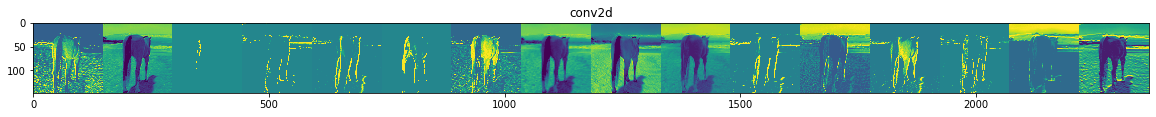

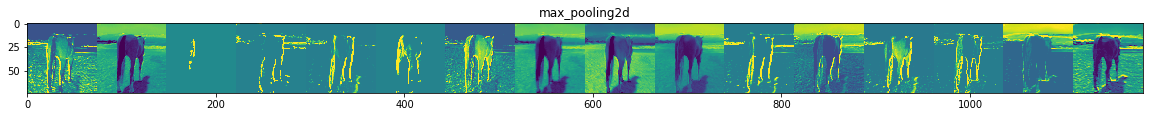

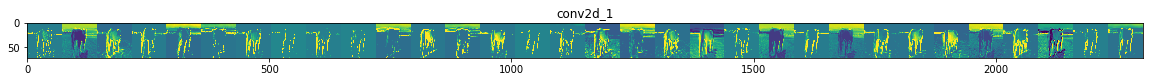

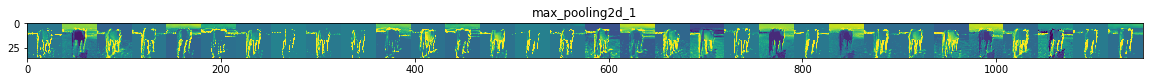

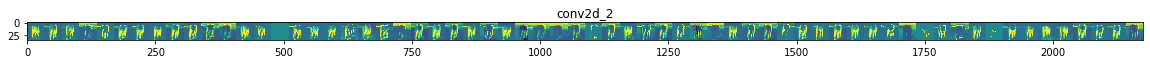

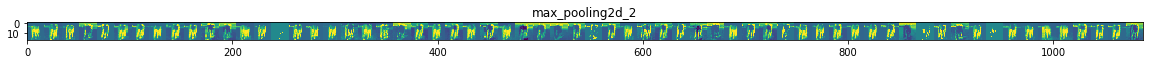

In [18]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

img_size = 150

# Intermediate representation of all the layers after the first layer
successive_outputs = [layer.output for layer in model.layers]

# New visualization_model obtained from our previously trained model
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random image from the training set
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]

# randomly choose an image
img_path = random.choice(horse_img_files + human_img_files)

img = image.load_img(img_path, target_size = (img_size, img_size)) # PIL image
x = img_to_array(img) #Numpy array of shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # reshapes the image to (1, 150, 150, 3)

# Rescale the image by 1/255.
x /= 255

# Let's run the image through our nsuetwork, thus obtaining all intermediate representations for this image
successive_feature_maps = visualization_model.predict(x)

# Name of the layers, which we can use as part of the image plot
layer_names = [layer.name for layer in model.layers]

# Display the intermediate representation
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    # feature_map has shape (1, size, size, n_features)
    if (len(feature_map.shape) == 4): #Just display it only for Conv2D and MaxPool layer, not fully-connected layers
        n_features = feature_map.shape[-1]  #Number of features/filters in feature map
        size = feature_map.shape[1]
        
        # tile our images in a matrix. 
        display_grid = np.zeros((size, size * n_features))  # display_grid (150, 150 * Num of filters)
        
        # Iterate through each feature/filter/channels
        for i in range(n_features):
            # Postprocess the feature
            x = feature_map[0, :, :, i] # ith filter
            x -= x.mean()
            x /= x.std()
            x *= 64
            x +=128
            x = np.clip(x, 0, 255).astype('uint8')
            # tile each filter into a big horizontal grid
            display_grid[:, i*size: (i+1) * size] = x
            
        # Display the grid
        scale = 20 / n_features
        plt.figure(figsize=(20,20))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid)

### Cleanup

Terminate the kernel and free up memory resources

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)